In [3]:
# Library Imports
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import plot_model, to_categorical, np_utils
from keras.datasets import cifar10

Using TensorFlow backend.


In [4]:
# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [5]:
# Get RGB Equivalent
num_pixels = x_train.shape[1]*x_train.shape[2]*x_train.shape[3]
print(num_pixels)
# 3 (RGB) * 32 * 32

3072


In [0]:
# Flatten data
x_train = x_train.reshape(-1, num_pixels).astype('float32')
x_test = x_test.reshape(-1, num_pixels).astype('float32')

In [7]:
# Convert to one-hot vector
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_class = y_train.shape[1]
print(num_class)

10


In [0]:
# Scaling
x_train = x_train/255
x_test = x_test/255

In [9]:
# Deep Learning Model: 3-layer MLP network 
model = Sequential()
# ---------- LAYERS ----------
# 1st MLP
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
# 2nd MLP
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))
# 3rd MLP
model.add(Dense(10, activation = 'softmax'))

In [10]:
# Indicate the loss function and use SGD as optimizer
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
# Feed the network with complete dataset (1 epoch) 100 times
# Batch size of SGD is 4
model.fit(x_train, y_train, epochs = 100, batch_size = 32)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
50000/50000 [==============================] - 12s 248us/step - loss: 1.9400 - acc: 0.2979
Epoch 2/100
50000/50000 [==============================] - 8s 162us/step - loss: 1.7683 - acc: 0.3702
Epoch 3/100
50000/50000 [==============================] - 8s 162us/step - loss: 1.6957 - acc: 0.3962
Epoch 4/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.6450 - acc: 0.4152
Epoch 5/100
50000/50000 [==============================] - 9s 174us/step - loss: 1.6040 - acc: 0.4290
Epoch 6/100
50000/50000 [==============================] - 8s 168us/step - loss: 1.5709 - acc: 0.4443
Epoch 7/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.5428 - acc: 0.4535
Epoch 8/100
50000/50000 [==============================] - 8s 163us/step

In [12]:
# Print summary to double check the network
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


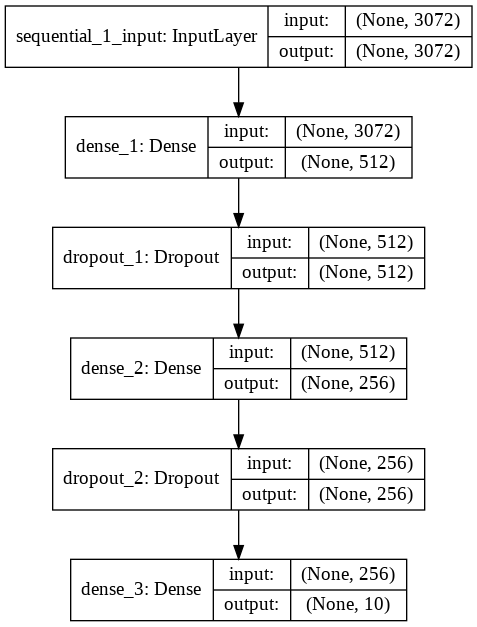

In [13]:
# Create a nice image of the network model
plot_model(model, to_file = 'linear-model.png', show_shapes = True)

In [14]:
# Print final accuracy
loss, acc = model.evaluate(x_test, y_test, batch_size = 32)
print("Test accuracy: %.2f%%" % (100 * acc))

10000/10000 [==============================] - 1s 65us/step
Test accuracy: 56.44%
